<a href="https://colab.research.google.com/github/antar555/thesis_project/blob/main/DDoS_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
from sklearn import preprocessing 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
from google.colab import files
files.upload()

Saving kddcup99_csv.csv to kddcup99_csv.csv


In [3]:
dataframe=pd.read_csv('kddcup99_csv.csv')

In [4]:
dataframe

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


In [5]:
dataframe.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [6]:
dataframe.label.unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

In [7]:
dataframe.drop(dataframe[dataframe['label']=='normal'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='buffer_overflow'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='loadmodule'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='perl'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='guess_passwd'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='portsweep'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='ipsweep'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='ftp_write'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='imap'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='satan'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='phf'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='nmap'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='multihop'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='warezmaster'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='warezclient'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='spy'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='rootkit'].index,inplace=True)

In [8]:
dataframe.label.unique()

array(['neptune', 'smurf', 'pod', 'teardrop', 'land', 'back'],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


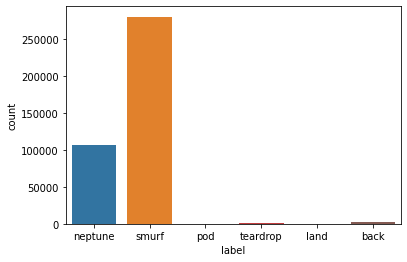

In [9]:
sns.countplot(dataframe.label)

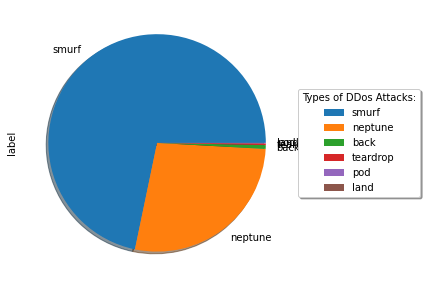

In [10]:
dataframe['label'].value_counts().plot(kind='pie',figsize=(8,5),shadow=True)
plt.legend(title = "Types of DDos Attacks:",loc='center left',bbox_to_anchor=(1, 0, 0.5, 1),shadow=True)

In [11]:
dataframe.protocol_type.unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


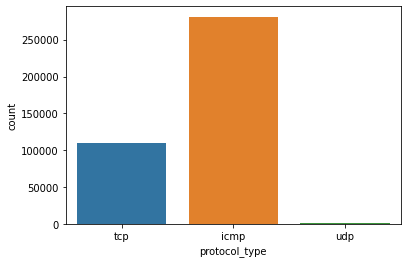

In [12]:
sns.countplot(dataframe.protocol_type)

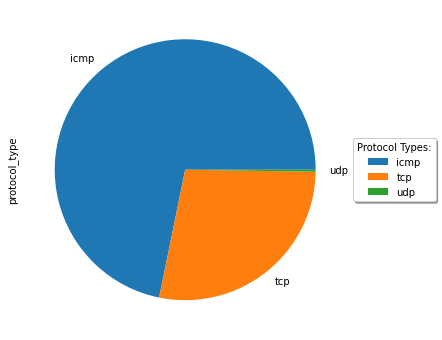

In [13]:
dataframe['protocol_type'].value_counts().plot(kind='pie',figsize=(8,6))
plt.legend(title = "Protocol Types:",loc='center left',bbox_to_anchor=(1, 0, 0.5, 1),shadow=True)

In [14]:
label_encoder = preprocessing.LabelEncoder() 
  

dataframe['service']= label_encoder.fit_transform(dataframe['service']) 
  
dataframe['service'].unique()

array([49, 10, 39, 13, 18, 43, 33, 19, 12, 26, 42, 38, 11, 51,  3, 52, 22,
       23, 55, 28,  9,  7, 48,  6,  8, 14, 15, 45, 27, 16, 40, 41,  5, 25,
       47, 21, 17,  4, 37, 36, 46,  1, 53, 34, 30, 31, 29, 20, 44, 54,  2,
        0, 35, 24, 32, 50])

In [15]:
dataframe.flag.unique()

array(['S0', 'SF', 'RSTR', 'S2', 'S1', 'REJ', 'RSTO'], dtype=object)

In [16]:
label_encoder = preprocessing.LabelEncoder() 
  
dataframe['flag']= label_encoder.fit_transform(dataframe['flag']) 
  
dataframe['flag'].unique()

array([3, 6, 2, 5, 4, 0, 1])

In [17]:
label_encoder = preprocessing.LabelEncoder() 
dataframe['protocol_type']= label_encoder.fit_transform(dataframe['protocol_type']) 
dataframe['protocol_type'].unique()

array([1, 0, 2])

In [18]:
dataframe.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [19]:
ddos_attacks={
    'neptune':0,'smurf':1,'pod':2,'teardrop':3,'land':4,'back':5
}


In [20]:
dataframe.label = dataframe.label.replace(ddos_attacks)
dataframe.label.unique()

array([0, 1, 2, 3, 4, 5])

In [21]:
X=dataframe.drop(['label'],axis=1)
y=dataframe.label

In [22]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
7601,0,1,49,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,5,0.83,1.0,0.0,0.0,0.83,0.33,0.0,5,6,1.00,0.00,0.20,0.33,1.0,0.83,0.0,0.0
7602,0,1,49,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,15,0.94,1.0,0.0,0.0,0.94,0.12,0.0,15,16,1.00,0.00,0.07,0.12,1.0,0.94,0.0,0.0
7793,0,0,10,6,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,316,316,0.00,0.0,0.0,0.0,1.00,0.00,0.0,148,3,0.02,0.02,0.02,0.00,0.0,0.00,0.0,0.0
7794,0,0,10,6,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.0,0.0,0.0,1.00,0.00,0.0,158,13,0.08,0.02,0.08,0.00,0.0,0.00,0.0,0.0
7795,0,0,10,6,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.0,0.0,0.0,1.00,0.00,0.0,168,23,0.14,0.02,0.14,0.00,0.0,0.00,0.0,0.0


In [23]:
FIT_FEATURES =SelectKBest(score_func=f_classif)

In [24]:
FIT_FEATURES.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 1  6  8 10 11 13 14 15 16 17 18 19 20 21] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=10, score_func=<function f_classif at 0x7fa91a509598>)

In [25]:
score_col=pd.DataFrame(FIT_FEATURES.scores_ ,columns=['value'])

In [26]:
name_col=pd.DataFrame(X.columns)
top_features=pd.concat([name_col,score_col],axis=1)

In [27]:
p=top_features.nlargest(10,'value')
p

,0,value
1,protocol_type,inf
6,land,inf
11,logged_in,inf
35,dst_host_same_src_port_rate,4.492706e+07
33,dst_host_same_srv_rate,2.557863e+07
7,wrong_fragment,1.723405e+07
23,srv_count,1.558174e+07
4,src_bytes,1.492846e+07
5,dst_bytes,1.390096e+07
32,dst_host_srv_count,1.386763e+07


In [28]:
df=dataframe[['protocol_type','land','logged_in','dst_host_same_src_port_rate','dst_host_same_srv_rate','wrong_fragment','srv_count','src_bytes','dst_bytes','dst_host_srv_count','label']]

In [29]:
df

,protocol_type,land,logged_in,dst_host_same_src_port_rate,dst_host_same_srv_rate,wrong_fragment,srv_count,src_bytes,dst_bytes,dst_host_srv_count,label
7601,1,0,0,0.20,1.00,0,5,0,0,6,0
7602,1,0,0,0.07,1.00,0,15,0,0,16,0
7793,0,0,0,0.02,0.02,0,316,1032,0,3,1
7794,0,0,0,0.08,0.08,0,511,1032,0,13,1
7795,0,0,0,0.14,0.14,0,511,1032,0,23,1
...,...,...,...,...,...,...,...,...,...,...,...
490959,2,0,0,0.38,0.38,3,29,28,0,96,3
490960,2,0,0,0.38,0.38,3,30,28,0,97,3
490961,2,0,0,0.38,0.38,3,31,28,0,98,3
490962,2,0,0,0.39,0.39,3,32,28,0,99,3


In [30]:
X=df.drop('label',axis='columns')
y=df.label

In [31]:
X.head()

,protocol_type,land,logged_in,dst_host_same_src_port_rate,dst_host_same_srv_rate,wrong_fragment,srv_count,src_bytes,dst_bytes,dst_host_srv_count
7601,1,0,0,0.20,1.00,0,5,0,0,6
7602,1,0,0,0.07,1.00,0,15,0,0,16
7793,0,0,0,0.02,0.02,0,316,1032,0,3
7794,0,0,0,0.08,0.08,0,511,1032,0,13
7795,0,0,0,0.14,0.14,0,511,1032,0,23


In [32]:
X.corr()

,protocol_type,land,logged_in,dst_host_same_src_port_rate,dst_host_same_srv_rate,wrong_fragment,srv_count,src_bytes,dst_bytes,dst_host_srv_count
protocol_type,1.000000,0.011475,0.117855,-0.989534,-0.975804,0.182286,-0.988887,0.014610,0.117525,-0.978872
land,0.011475,1.000000,-0.000551,0.002474,0.002301,-0.000393,-0.011943,-0.001774,-0.000549,-0.012280
logged_in,0.117855,-0.000551,1.000000,-0.118566,0.046507,-0.004034,-0.122054,0.991979,0.997196,0.013614
dst_host_same_src_port_rate,-0.989534,0.002474,-0.118566,1.000000,0.985727,-0.052177,0.995848,-0.014965,-0.118357,0.988082
dst_host_same_srv_rate,-0.975804,0.002301,0.046507,0.985727,1.000000,-0.057001,0.981441,0.149407,0.046376,0.996967
wrong_fragment,0.182286,-0.000393,-0.004034,-0.052177,-0.057001,1.000000,-0.076798,-0.011046,-0.004018,-0.063292
srv_count,-0.988887,-0.011943,-0.122054,0.995848,0.981441,-0.076798,1.000000,-0.017737,-0.121712,0.985980
src_bytes,0.014610,-0.001774,0.991979,-0.014965,0.149407,-0.011046,-0.017737,1.000000,0.991192,0.116834
dst_bytes,0.117525,-0.000549,0.997196,-0.118357,0.046376,-0.004018,-0.121712,0.991192,1.000000,0.013802
dst_host_srv_count,-0.978872,-0.012280,0.013614,0.988082,0.996967,-0.063292,0.985980,0.116834,0.013802,1.000000


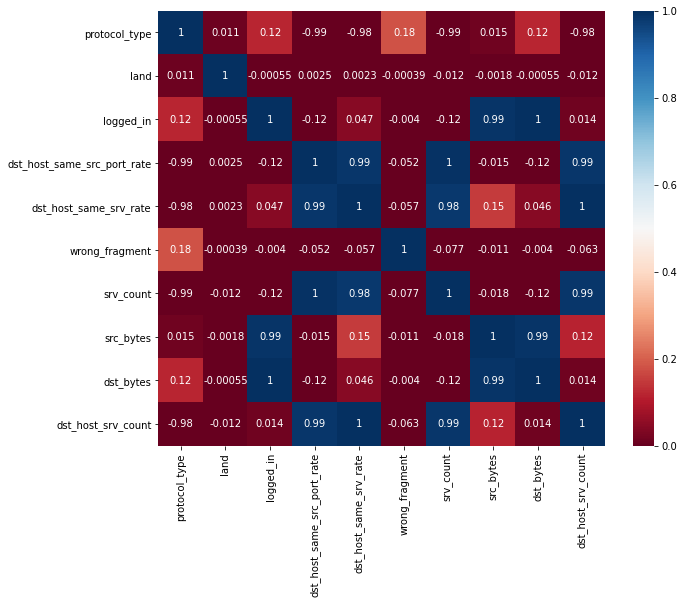

In [33]:
plt.figure(figsize=(10,8))
heat_map = sns.heatmap(X.corr(), annot=True,cmap="RdBu",vmin=0, vmax=1 )
heat_map

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.5)

In [86]:
len(X_train)

195729

In [87]:
len(X_test)

195729

In [35]:
%%time
svc= SVC()
svc.fit(X_train,y_train)

CPU times: user 5.28 s, sys: 37 ms, total: 5.32 s
Wall time: 5.33 s


In [36]:
y_predict = svc.predict(X_test)
for i in y_predict:
    if i==0:
        print("neptune")
    elif i==1:
        print("smurf")
    elif i==2:
        print("pod")
    elif i==3:
        print("teardrop")
    elif i==4:
        print("land")
    elif i==5:
        print("back")

Streaming output truncated to the last 5000 lines.
neptune
smurf
smurf
neptune
smurf
neptune
smurf
neptune
neptune
smurf
neptune
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
neptune
neptune
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
neptune
back
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
sm

In [37]:
svm=svc.score(X_test,y_test)
p=100
m1=svm*p
print("Accuracy: ",m1)

Accuracy:  99.74045746925596


In [38]:
svm_error=np.mean(y_predict != y_test)
svm_error

0.0025954253074403897

Confusion Matrix:
 [[ 53698      0      0      0      0      0]
 [     0 140296      0      0      0      0]
 [     0      2    125      0      0      0]
 [   498      0      0      0      0      0]
 [     8      0      0      0      0      0]
 [     0      0      0      0      0   1102]]


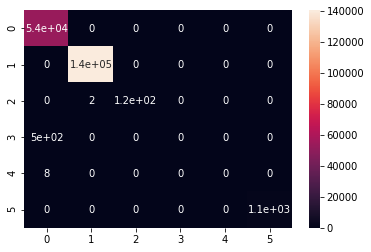

In [40]:
cm_svm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",cm_svm)
sns.heatmap(cm_svm, annot=True)

In [41]:
svm_report = classification_report(y_test,y_predict)
print("Report:\n",svm_report)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     53698
           1       1.00      1.00      1.00    140296
           2       1.00      0.98      0.99       127
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00         8
           5       1.00      1.00      1.00      1102

    accuracy                           1.00    195729
   macro avg       0.67      0.66      0.66    195729
weighted avg       0.99      1.00      1.00    195729



In [42]:
%%time
RF = RandomForestClassifier(max_depth=7)
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)
for i in y_predict:
    if i==0:
        print("neptune")
    elif i==1:
        print("smurf")
    elif i==2:
        print("pod")
    elif i==3:
        print("teardrop")
    elif i==4:
        print("land")
    elif i==5:
        print("back")

Streaming output truncated to the last 5000 lines.
smurf
neptune
smurf
neptune
smurf
neptune
neptune
smurf
neptune
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
neptune
neptune
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
neptune
back
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smur

In [43]:
rf=RF.score(X_test,y_test)
p=100
m2=rf*p
print(m2)

99.99897817901282


In [44]:
RF_error=np.mean(y_predict != y_test)
RF_error

1.0218209871812557e-05

Confusion Matrix:
 [[ 53698      0      0      0      0      0]
 [     0 140296      0      0      0      0]
 [     0      0    127      0      0      0]
 [     0      0      0    498      0      0]
 [     2      0      0      0      6      0]
 [     0      0      0      0      0   1102]]


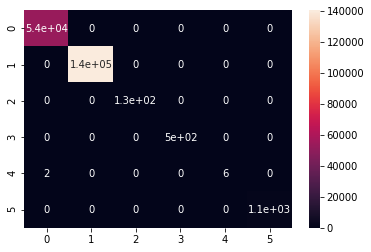

In [45]:
cm_rf = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",cm_rf)
sns.heatmap(cm_rf, annot=True)

In [46]:
rf_report = classification_report(y_test,y_predict)
print("Report:\n",rf_report)

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53698
           1       1.00      1.00      1.00    140296
           2       1.00      1.00      1.00       127
           3       1.00      1.00      1.00       498
           4       1.00      0.75      0.86         8
           5       1.00      1.00      1.00      1102

    accuracy                           1.00    195729
   macro avg       1.00      0.96      0.98    195729
weighted avg       1.00      1.00      1.00    195729



In [47]:
%%time
KNN=KNeighborsClassifier(n_neighbors=6,weights='uniform',leaf_size=50)
KNN.fit(X_train, y_train)
y_predict = KNN.predict(X_test)
for i in y_predict:
    if i==0:
        print("neptune")
    elif i==1:
        print("smurf")
    elif i==2:
        print("pod")
    elif i==3:
        print("teardrop")
    elif i==4:
        print("land")
    elif i==5:
        print("back")


Streaming output truncated to the last 5000 lines.
smurf
neptune
smurf
neptune
smurf
neptune
neptune
smurf
neptune
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
neptune
neptune
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
neptune
back
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smur

In [48]:
knn=KNN.score(X_test,y_test)
p=100
m3=knn*p
print("Accuracy: ",m3)

Accuracy:  99.99744544753206


In [49]:
KNN_error=np.mean(y_predict != y_test)
KNN_error

2.5545524679531393e-05

Confusion Matrix:
 [[ 53698      0      0      0      0      0]
 [     0 140296      0      0      0      0]
 [     0      2    125      0      0      0]
 [     0      0      0    498      0      0]
 [     3      0      0      0      5      0]
 [     0      0      0      0      0   1102]]


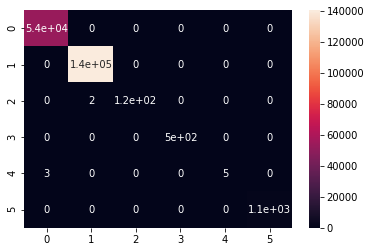

In [50]:
cm_knn = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",cm_knn)
sns.heatmap(cm_knn, annot=True)

In [51]:
knn_report = classification_report(y_test,y_predict)
print("Report:\n",knn_report)

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53698
           1       1.00      1.00      1.00    140296
           2       1.00      0.98      0.99       127
           3       1.00      1.00      1.00       498
           4       1.00      0.62      0.77         8
           5       1.00      1.00      1.00      1102

    accuracy                           1.00    195729
   macro avg       1.00      0.93      0.96    195729
weighted avg       1.00      1.00      1.00    195729



In [58]:
%%time
MLP=MLPClassifier(hidden_layer_sizes=100,activation='relu')
MLP.fit(X_train, y_train)
y_predict = MLP.predict(X_test)
for i in y_predict:
    if i==0:
        print("neptune")
    elif i==1:
        print("smurf")
    elif i==2:
        print("pod")
    elif i==3:
        print("teardrop")
    elif i==4:
        print("land")
    elif i==5:
        print("back")


Streaming output truncated to the last 5000 lines.
smurf
neptune
smurf
neptune
smurf
neptune
neptune
smurf
neptune
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
neptune
neptune
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
neptune
back
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smur

In [59]:
mlp=MLP.score(X_test,y_test)
p=100
m5=mlp*p
print("Accuracy: ",m5)

Accuracy:  99.99642362654487


In [60]:
MLP_error=np.mean(y_predict != y_test)
MLP_error

3.576373455134395e-05

Confusion Matrix:
 [[ 53698      0      0      0      0      0]
 [     0 140291      5      0      0      0]
 [     0      0    127      0      0      0]
 [     0      0      0    498      0      0]
 [     1      0      0      0      7      0]
 [     0      0      1      0      0   1101]]


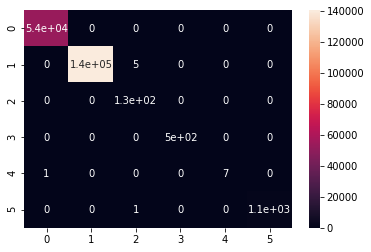

In [61]:
cm_mlp = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",cm_mlp)
sns.heatmap(cm_mlp, annot=True)

In [62]:
mlp_report = classification_report(y_test,y_predict)
print("Report:\n",mlp_report)

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53698
           1       1.00      1.00      1.00    140296
           2       0.95      1.00      0.98       127
           3       1.00      1.00      1.00       498
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00      1102

    accuracy                           1.00    195729
   macro avg       0.99      0.98      0.98    195729
weighted avg       1.00      1.00      1.00    195729



In [63]:
%%time
NB=GaussianNB()
NB.fit(X_train,y_train)
y_predict = NB.predict(X_test)
for i in y_predict:
    if i==0:
        print("neptune")
    elif i==1:
        print("smurf")
    elif i==2:
        print("pod")
    elif i==3:
        print("teardrop")
    elif i==4:
        print("land")
    elif i==5:
        print("back")

Streaming output truncated to the last 5000 lines.
smurf
neptune
smurf
neptune
smurf
neptune
neptune
smurf
neptune
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
neptune
neptune
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
neptune
back
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smur

In [64]:
nb=NB.score(X_test,y_test)
p=100
m6=nb*p
print("Accuracy: ",m6)

Accuracy:  99.9621926234743


In [65]:
NB_error=np.mean(y_predict != y_test)
NB_error

0.0003780737652570646

Confusion Matrix:
 [[ 53692      0      6      0      0      0]
 [     0 140230     66      0      0      0]
 [     0      0    127      0      0      0]
 [     0      0      0    496      0      2]
 [     0      0      0      0      8      0]
 [     0      0      0      0      0   1102]]


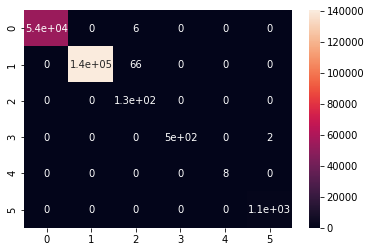

In [66]:
cm_nb = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",cm_nb)
sns.heatmap(cm_nb, annot=True)

In [67]:
nb_report = classification_report(y_test,y_predict)
print("Report:\n",nb_report)

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53698
           1       1.00      1.00      1.00    140296
           2       0.64      1.00      0.78       127
           3       1.00      1.00      1.00       498
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00      1102

    accuracy                           1.00    195729
   macro avg       0.94      1.00      0.96    195729
weighted avg       1.00      1.00      1.00    195729



In [69]:
classifiers = ["SVM","RF","KNN","MLP","NB"]
scores = [m1,m2,m3,m5,m6]

In [70]:
Accuracy=pd.DataFrame(scores,classifiers)
Accuracy.columns=['Accuracy']

In [72]:
accu_err_data={
    'Algorithm':["SVM","RF","KNN","MLP","NB"],
    'Accuracy':[m1,m2,m3,m5,m6],
    'Error_rate':[svm_error,RF_error,KNN_error,MLP_error,NB_error]
}
df=pd.DataFrame(accu_err_data)

In [73]:
df

,Algorithm,Accuracy,Error_rate
0,SVM,99.740457,0.002595
1,RF,99.998978,0.000010
2,KNN,99.997445,0.000026
3,MLP,99.996424,0.000036
4,NB,99.962193,0.000378


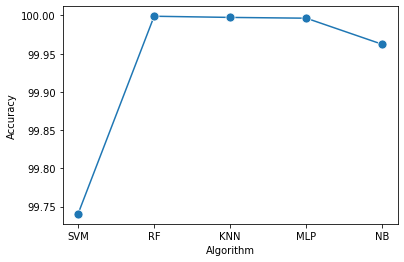

In [78]:
sns.lineplot(data=df, x="Algorithm", y="Accuracy",marker='o', markersize=9)

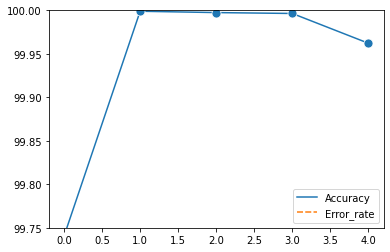

In [81]:
plt.ylim(99.75,100)
sns.lineplot(data=df,marker='o', markersize=9)

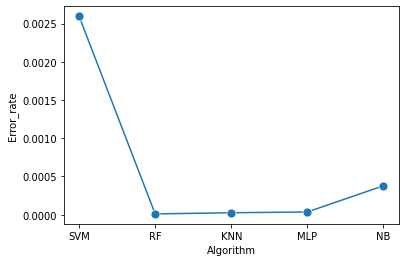

In [85]:
sns.lineplot(data=df, x="Algorithm", y="Error_rate",marker='o', markersize=9)